# Numerical Method

## Monte Carlo 101

The purpose of this notebook is to introduce the concept of Monte Carlo estimate, and then illustrate it with two examples:

- Approximating the constant $\pi$
- Approximating the price of an European option

In [1]:
# Imports 
from scipy.stats import uniform, norm
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Optional Configuration
import seaborn as sns 
sns.set(style="whitegrid")

%config InlineBackend.figure_format ='retina'
%config Completer.use_jedi = False

Monte Carlo methods can be thought of as a stochastic way to approximate integrals which can be written as expectations, i.e. 

$$\theta = \mathbb{E}[\phi (X)] 	\int_{\mathbb{R}^d} \phi(x) f_X(x)dx$$

where $\phi$ is a real function and $f_X$ represents the probability density function of a random variable $X$.

**Algorithm**

1. Simulate  $X_1, \cdots, X_n$  independent samples from a random variable with probability density function $f_X$
2. Return   $ \hat{\theta} _n= \frac{1}{n}\sum_{i=1}^{n} \phi(X_i)$.

### Estimate the value of $\pi$ using Monte Carlo

To compute Monte Carlo estimates of $\pi$, we can use the function 

$$ f(x) \sqrt{(1- x^2)}.$$
To see this, let's take a look at the function on the interval [0,1] in the following plot. 

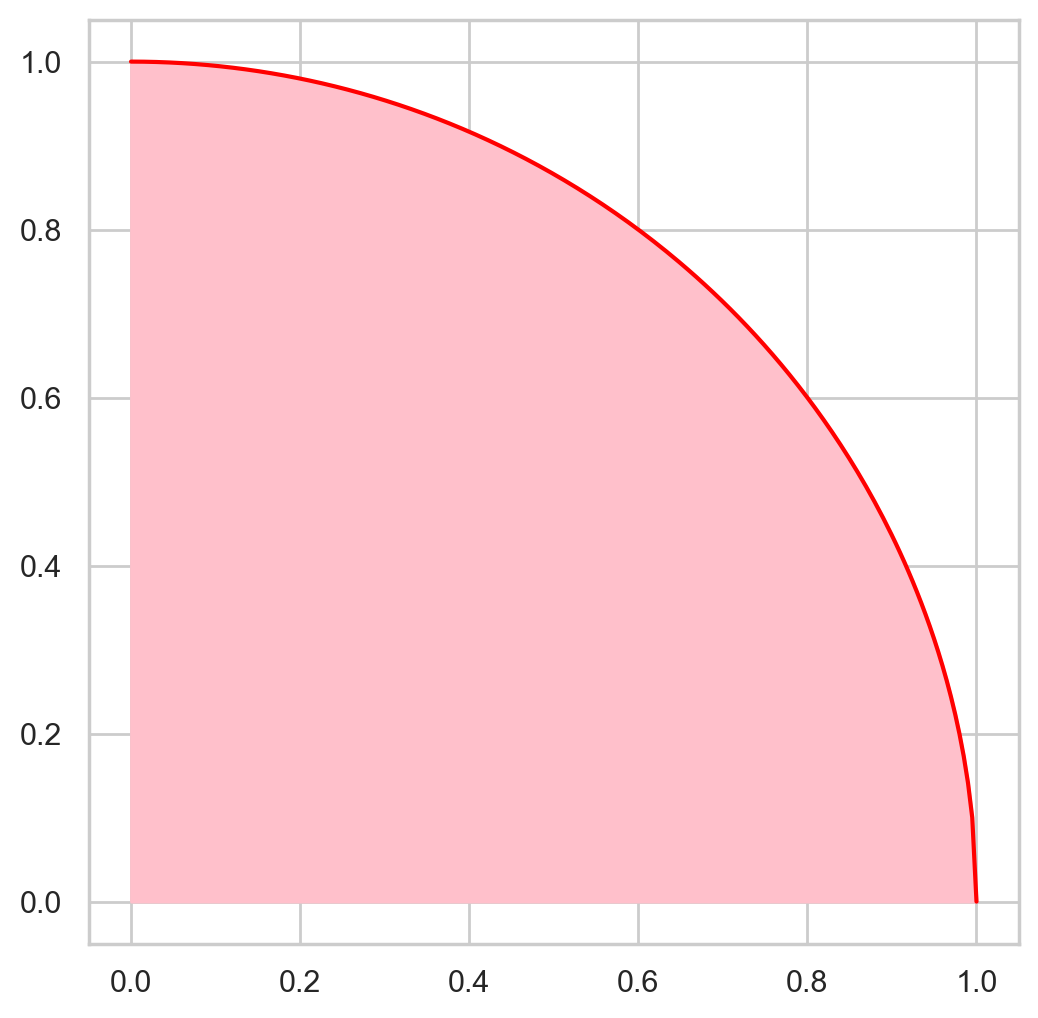

In [3]:
x = np.linspace(0.0, 1.0, 200)
y = np.sqrt(1 - x**2)

plt.figure(figsize=(6,6))
plt.plot(x, y, color='red')
plt.fill_between(x, y, color='pink')
plt.show()

We can see that it  forms a quarter circle of unit radius. Hence, the exact area under the curve is $\pi$ / 4. That is,

$$\int_0^1 \sqrt{(1- x^2)}dx  = \frac{\pi}{4}.$$

So, if we can estimate the integral, we can obtain an estimate of $\pi$ by multiplying by four.

Next, we need to find a way to write the integral as an expectation. Recall that if $X$ is a uniformly distributed continuous random variable on [0,1], then 
$$\mathbb{E}[f(X)]= \int_0^1 f(x) dx .$$ 

So, for our particular $f$, we obtain
$$\theta = \mathbb{E}[f(X)]= \int_0^1 f(x) dx  = \int_0^1  \sqrt{(1 – x^2)} dx,$$ 
and we can use Monte Carlo by simply generating independent samples $\{X_i\}_{i=1}^n$ from the uniform  distribution and then calculate the average, i.e.:

$$\hat{\theta}_n = \frac{1}{n} \sum_{i = 1}^n \sqrt{(1- x_i^2)} \approx \frac{\pi}{4} $$

In [4]:
n = 500
x_sample = uniform.rvs(size=n)
MCn_estimate = np.mean( np.sqrt(1-x_sample**2))
print(MCn_estimate*4)

3.17066405289196


In [5]:
n = 1000
x_sample = uniform.rvs(size=n)
MCn_estimate = np.mean( np.sqrt(1-x_sample**2) )
print(MCn_estimate*4)

3.1421163764943074


In [6]:
def get_MCn_estimate(n):
    x_sample = uniform.rvs(size=n)
    MCn_estimate = np.mean( np.sqrt(1-x_sample**2) )
    return MCn_estimate

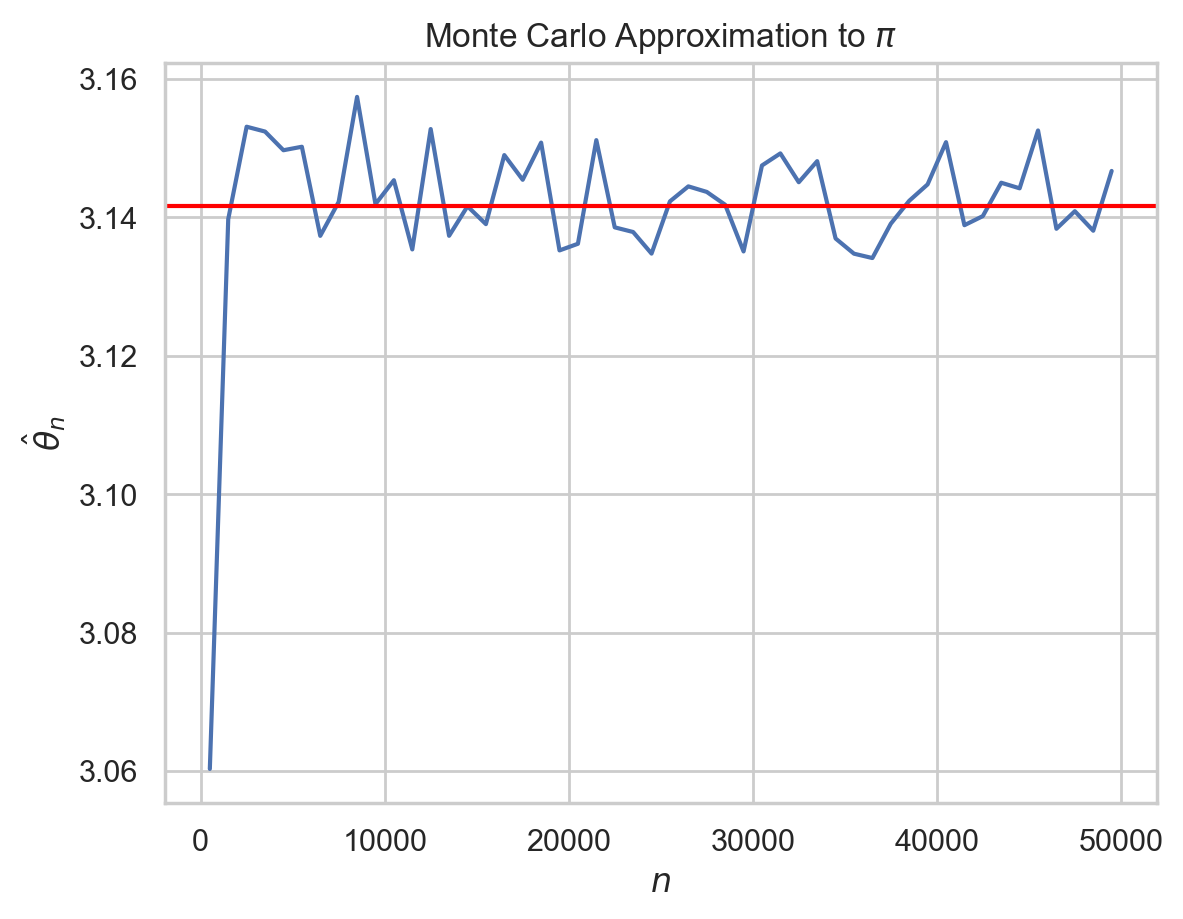

In [7]:
ns = np.arange(500, 50000, 1000)
estimates = [get_MCn_estimate(n)*4 for n in ns]
plt.plot(ns, estimates)
plt.axhline(y = np.pi, color='red')
plt.title('Monte Carlo Approximation to $\pi$')
plt.xlabel('$n$')
plt.ylabel(r'${\hat{\theta}}_n$')
plt.show()

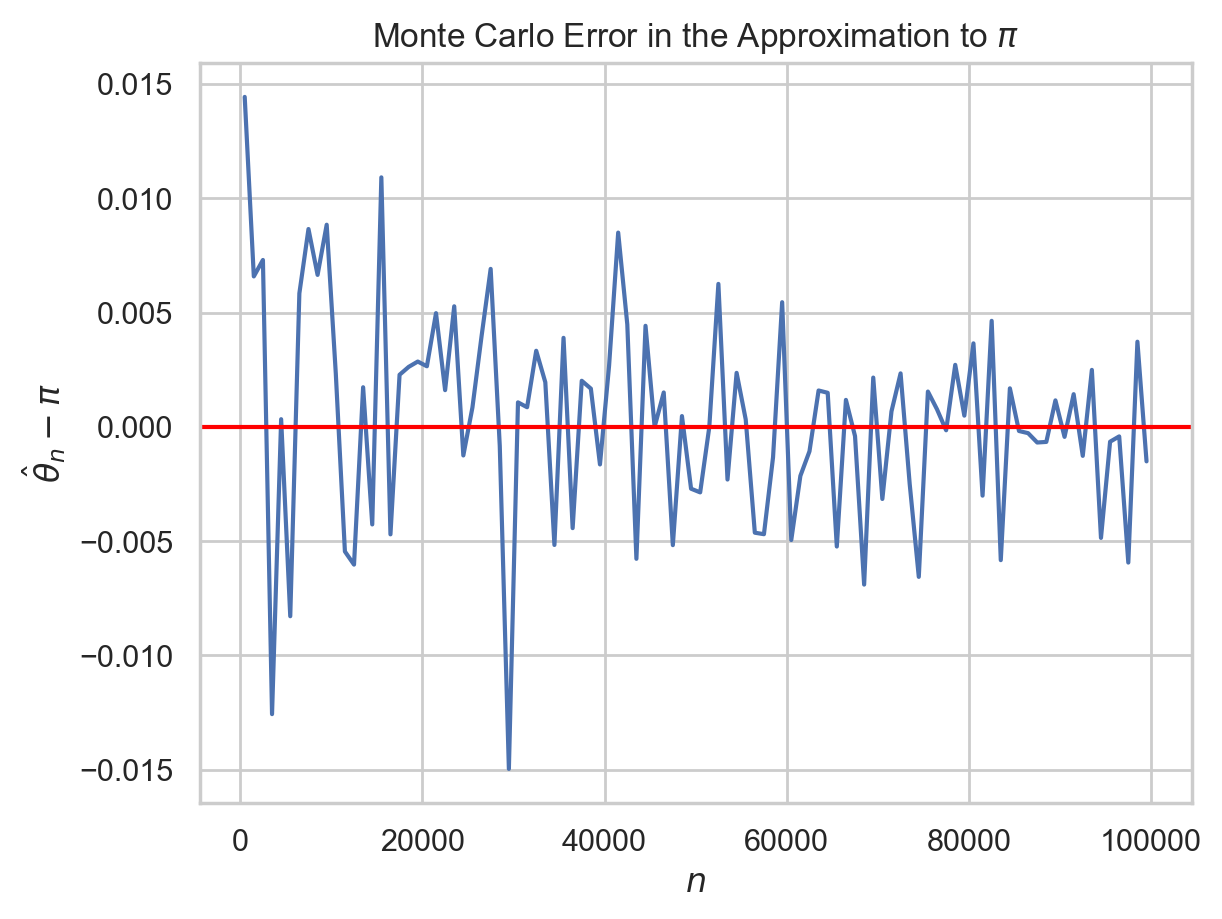

In [8]:
ns = np.arange(500, 100000, 1000)
errors = [get_MCn_estimate(n)*4 - np.pi for n in ns]
plt.plot(ns, errors)
plt.axhline(y = 0.0, color='red')
plt.title('Monte Carlo Error in the Approximation to $\pi$')
plt.xlabel('$n$')
plt.ylabel(r'${\hat{\theta}}_n - \pi$')
plt.show()

### Estimate the Price of a European Option unde the B-S model

The idea is to use the fact the price of the option can be written as
$$  V(t,S_t) = e^{-r(T-t)} \mathbb{E}_t[(S_T - K)^+],$$

and that $S_T|S_t$ follows a log-normal distribution

$$S_T |S_t \sim LogNormal\left(\ln(S_t) +  \left( r-\frac{1}{2}\sigma^2 \right)(T-t),\sigma^2(T-t)\right),$$
or equivalently $\ln(S_T)|S_t$  follows a normal distribution

$$\ln(S_T) |S_t \sim \mathcal{N}\left( \ln(S_t) +  \left( r-\frac{1}{2}\sigma^2 \right)(T-t),\sigma^2(T-t) \right).$$ 

So, we simply generate independent samples $\{S_i\}_{i=1}^n$ from the log-normal distribution and then calculate the average

$$ \theta_n = e^{-r(T-t)}  \frac{1}{n} \sum_{i = 1}^n (S_i - K)^{+} $$

In [9]:
S=100.0     # St spot stock price
K=100.0     # strike
tau=1.0     # T-t
r=0.1       # risk free rate 
sigma=0.2   # diffusion coefficient or volatility
n=1000      # Number of simulations

Zs = norm.rvs(loc=0, scale=1, size=n)
Ss = S*np.exp((r - 0.5*sigma**2)*tau + sigma*np.sqrt(tau)*Zs)
Vs = np.exp(-r*tau)*np.maximum(Ss-K, 0)

mc_estimator = np.mean(Vs)

print(mc_estimator)

12.871751144120761


In [10]:
def BS_MonteCarlo(payoff="call", S=100., K=100., tau=1.0, r=0.1, sigma=0.2, n=1000):

    Zs = norm.rvs(loc=0, scale=1, size=n)
    Ss = S*np.exp((r - 0.5*sigma**2)*tau + sigma*np.sqrt(tau)*Zs)
    
    if payoff == "call":
        Vs = np.exp(-r*tau)*np.maximum(Ss-K, 0)
    elif payoff == "put":
        Vs = np.exp(-r*tau)*np.maximum(K-Ss, 0)
    else:
        raise ValueError("Payoff not implemented. Set 'call' or 'put'")

    mc_estimator = np.mean(Vs)

    return mc_estimator

In [11]:
BS_MonteCarlo(n=100)

13.205516619997734

In [12]:
BS_MonteCarlo(n=100)

12.97794309597628

In [13]:
BS_MonteCarlo(n=5000)

13.34610175881843

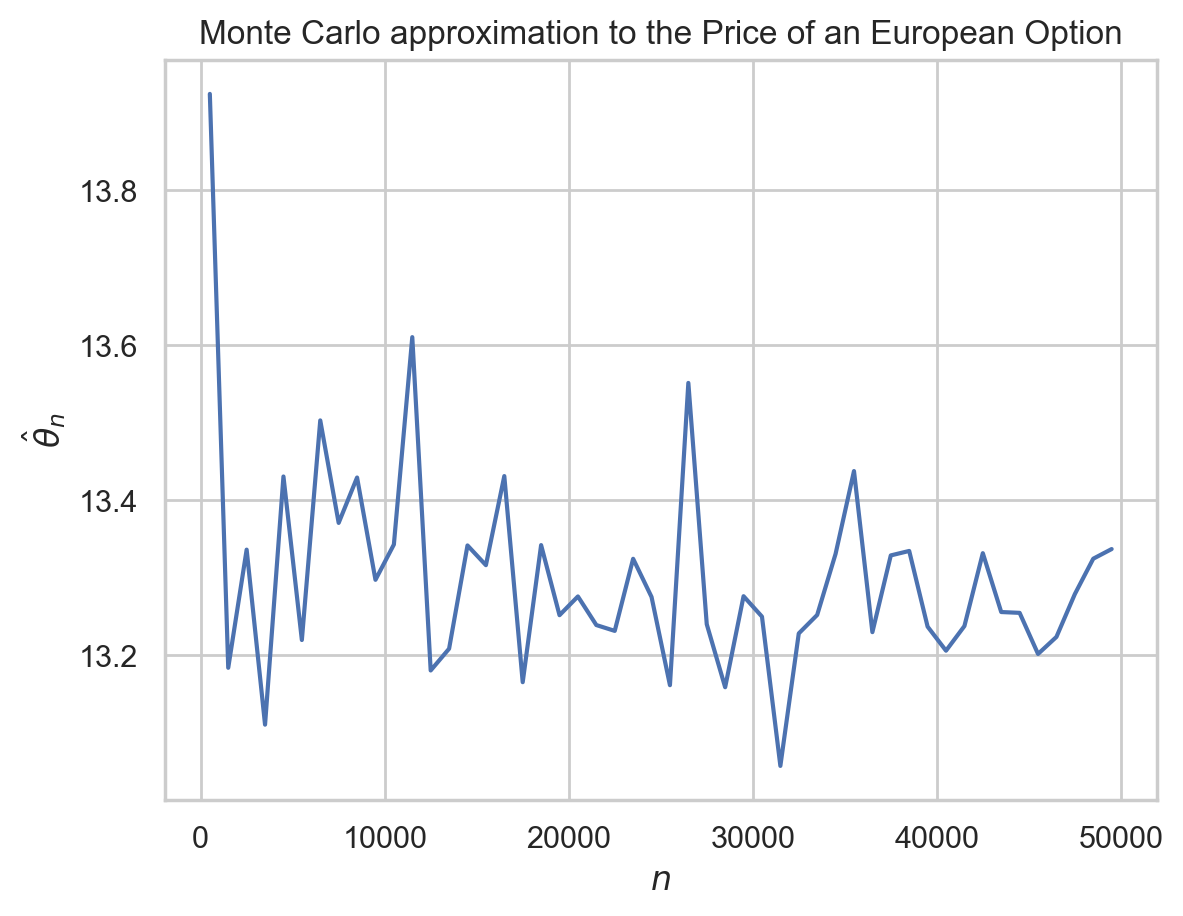

In [14]:
ns = np.arange(500, 50000, 1000)
estimates = [BS_MonteCarlo(n=n) for n in ns]
plt.plot(ns, estimates)
plt.title('Monte Carlo approximation to the Price of an European Option')
plt.xlabel('$n$')
plt.ylabel(r'${\hat{\theta}}_n $')
plt.show()

In [15]:
def BS_Analytical_Formula(payoff="call", S=100., K=100., tau=1., r=0.1, sigma=0.2):
    # Here tau = T-t Time to expiration

    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*(tau))/(sigma*np.sqrt(tau))
    d2 = d1 - sigma*np.sqrt(tau)

    if payoff == "call":
        price = norm.cdf(d1)*S - norm.cdf(d2)*K*np.exp(-r*tau)
    elif payoff=="put":
        price = -norm.cdf(-d1)*S + norm.cdf(-d2)*K*np.exp(-r*tau)
    else:
        raise ValueError("Payoff not implemented. Set 'call' or 'put'")

    return price

In [16]:
BS_Analytical_Formula()

13.269676584660886

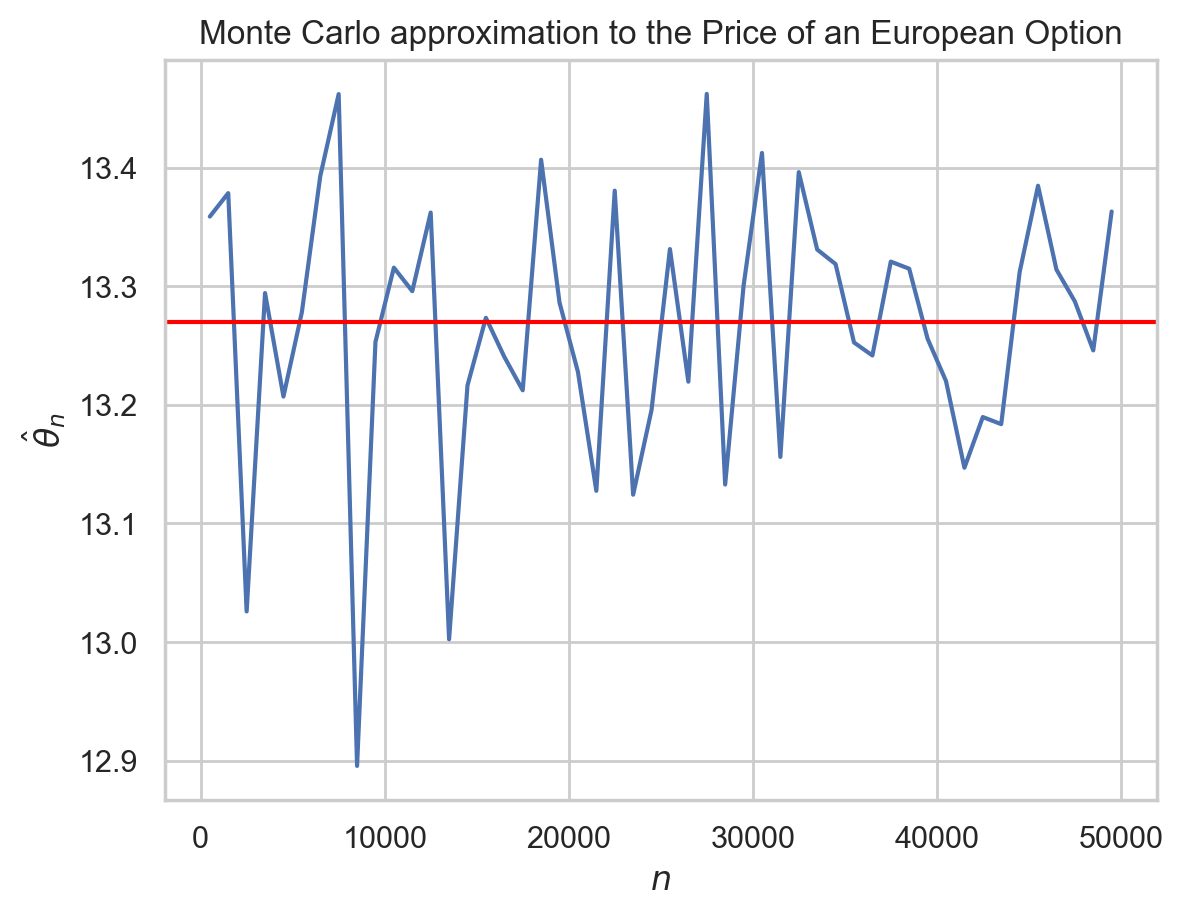

In [17]:
ns = np.arange(500, 50000, 1000)
estimates = [BS_MonteCarlo(n=n) for n in ns]
true_value = BS_Analytical_Formula()
plt.plot(ns, estimates)
plt.axhline(y = true_value, color='red', label='True Value')
plt.title('Monte Carlo approximation to the Price of an European Option')
plt.xlabel('$n$')
plt.ylabel(r'${\hat{\theta}}_n $')
plt.show()

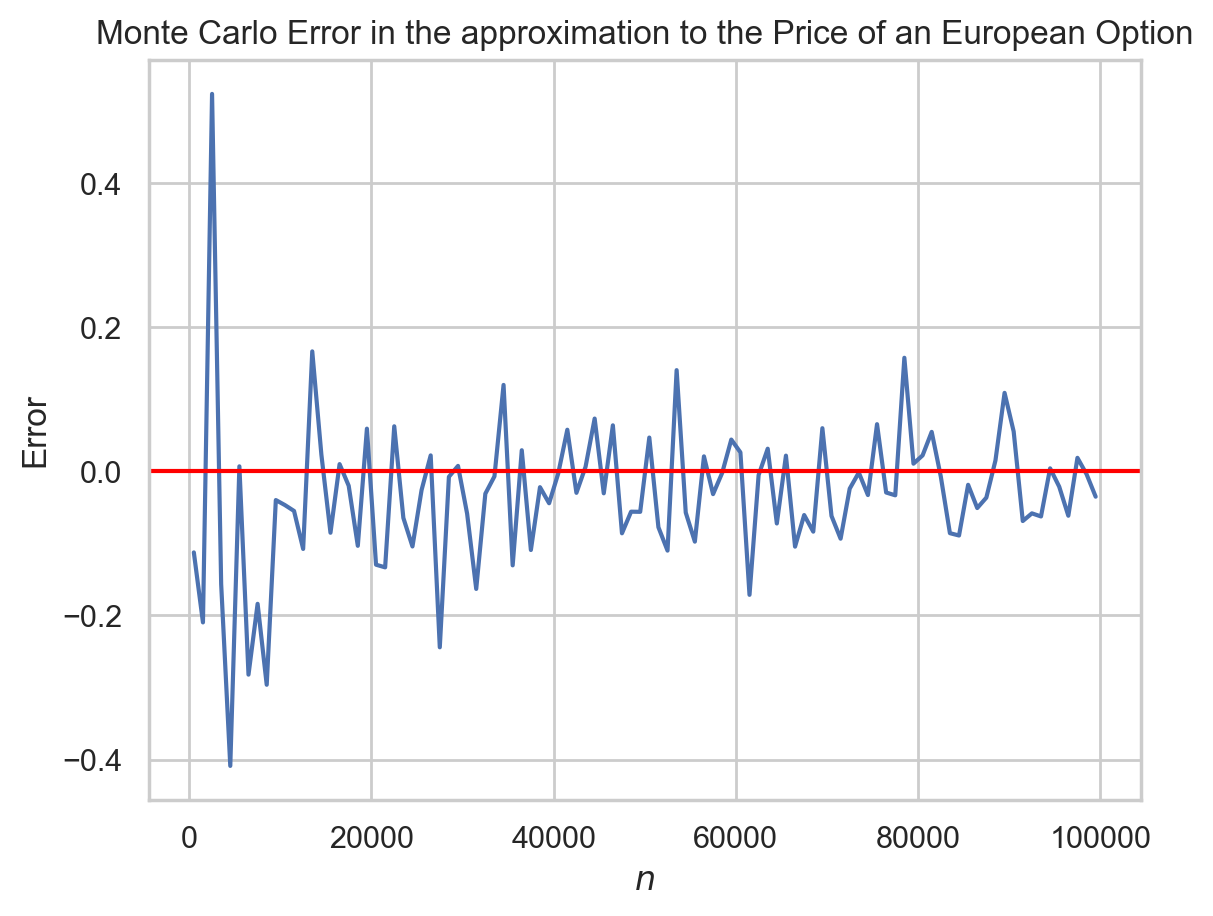

In [18]:
ns = np.arange(500, 100000, 1000)
errors = [BS_MonteCarlo(n=n) - true_value for n in ns]
plt.plot(ns, errors)
plt.axhline(y = 0.0, color='red')
plt.title('Monte Carlo Error in the approximation to the Price of an European Option')
plt.xlabel('$n$')
plt.ylabel(r'Error')
plt.show()

Hope you enjoy this little projet! I would like to thanks the University of Mixteca who allowed to participate at the 6th international conferance on Mathematical modeling 